In [29]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

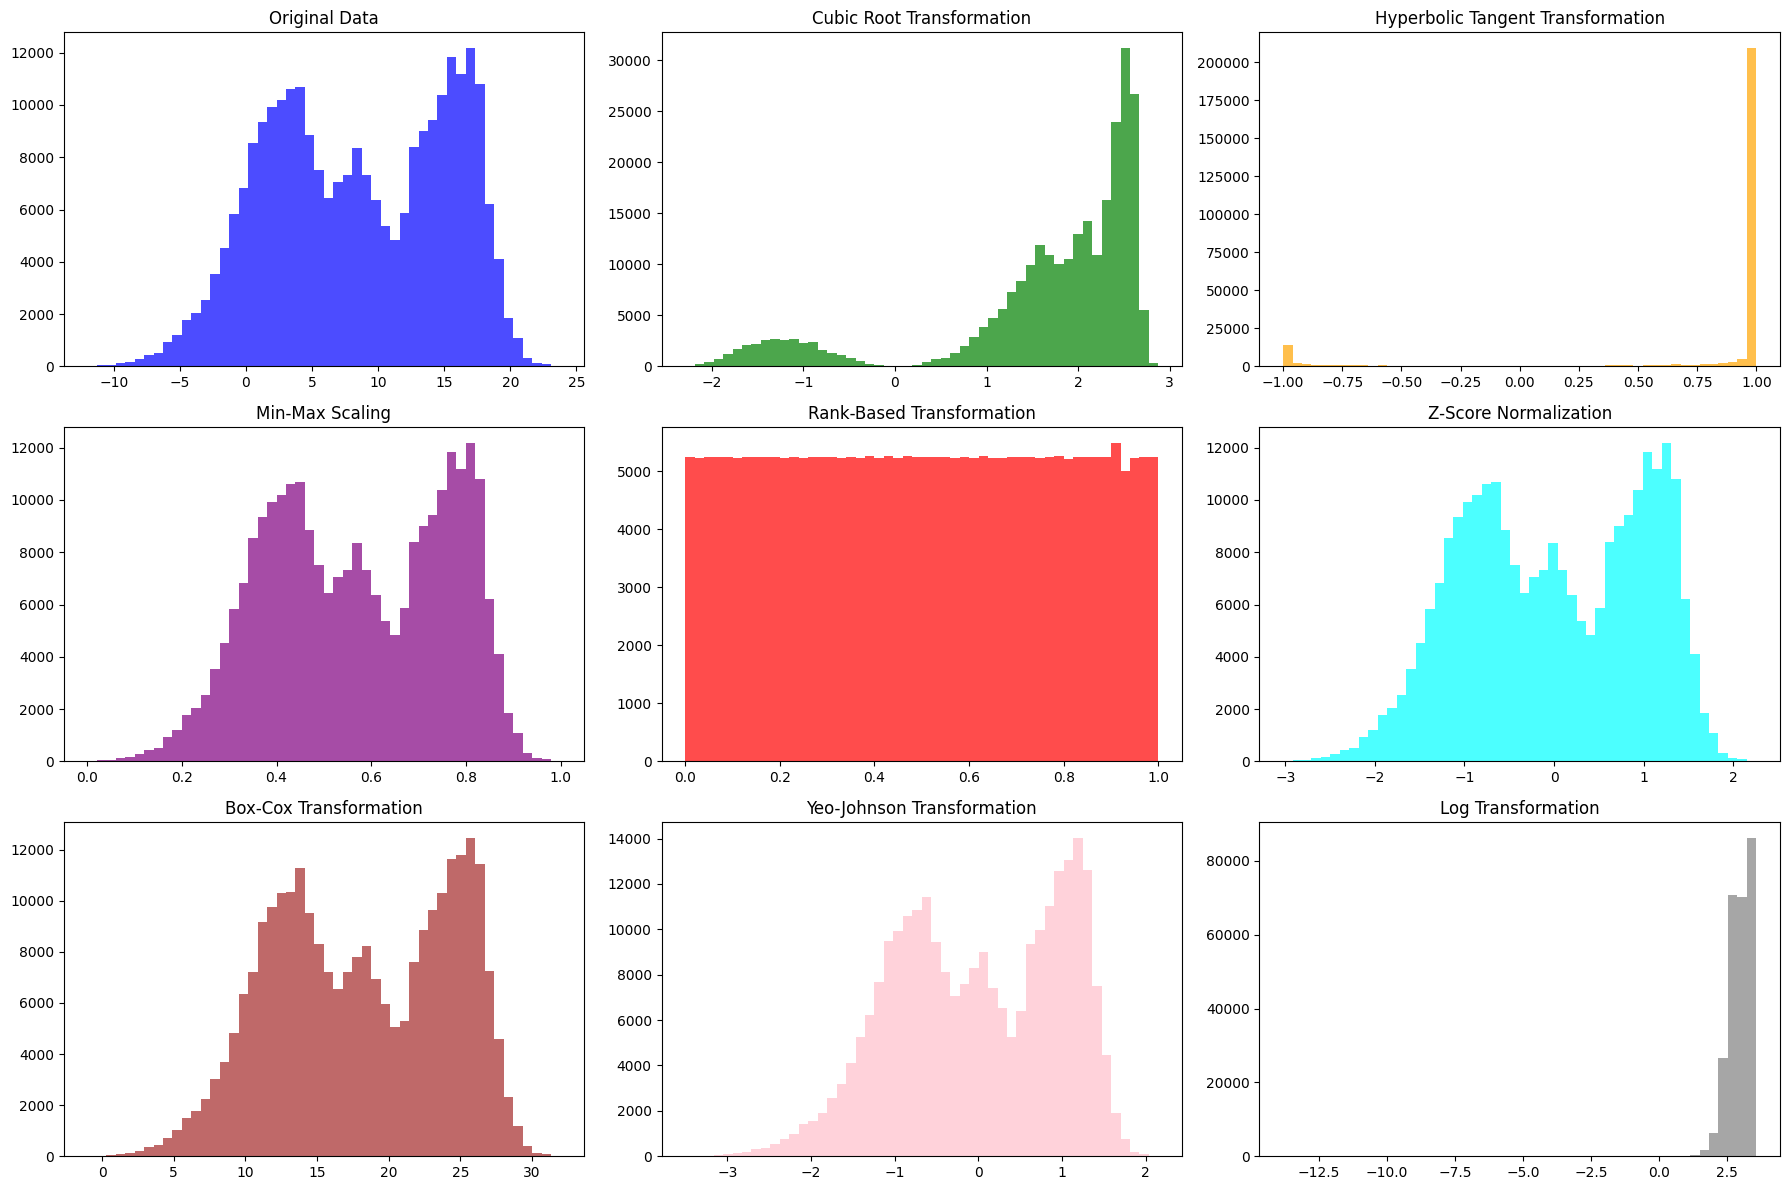

In [30]:
# Load your dataset
data_count = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', parse_dates=[0])
#print(data_count.head())

# Filter data for Germany
data_country = data_count[data_count['Country'] == 'Germany']

# Extract relevant data (e.g., AverageTemperature) and handle missing values
original_data = data_country['AverageTemperature'].dropna()

# Apply transformations
# 1. Cubic Root Transformation
cubic_root_transformed = np.cbrt(original_data)

# 2. Hyperbolic Tangent Transformation
tanh_transformed = np.tanh(original_data)

# 3. Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
min_max_transformed = scaler.fit_transform(original_data.values.reshape(-1, 1)).flatten()

# 4. Rank-Based Transformation (Percentile Ranking)
rank_transformed = original_data.rank(pct=True)

# 5. Standardization (Z-Score Normalization)
zscore_transformed = (original_data - original_data.mean()) / original_data.std()

# 6. Box-Cox Transformation
# Ensure data is positive for Box-Cox transformation
shifted_data = original_data - original_data.min() + 1e-6  # Shift to make all values positive
boxcox_transformed, _ = boxcox(shifted_data)

# 7. Yeo-Johnson Transformation (for data with negative values)
pt = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = pt.fit_transform(original_data.values.reshape(-1, 1)).flatten()

# 8. Log Transformation
# Ensure all values are positive by shifting the data
shifted_data_ln = original_data - original_data.min() + 1e-6  # Shift to make all values positive
ln_transformed = np.log(shifted_data_ln)

# Plot original and transformed data
plt.figure(figsize=(18, 12))

# Original Data
plt.subplot(3, 3, 1)
plt.hist(original_data, bins=50, color='blue', alpha=0.7)
plt.title('Original Data')

# Cubic Root Transformation
plt.subplot(3, 3, 2)
plt.hist(cubic_root_transformed, bins=50, color='green', alpha=0.7)
plt.title('Cubic Root Transformation')

# Hyperbolic Tangent Transformation
plt.subplot(3, 3, 3)
plt.hist(tanh_transformed, bins=50, color='orange', alpha=0.7)
plt.title('Hyperbolic Tangent Transformation')

# Min-Max Scaling
plt.subplot(3, 3, 4)
plt.hist(min_max_transformed, bins=50, color='purple', alpha=0.7)
plt.title('Min-Max Scaling')

# Rank-Based Transformation
plt.subplot(3, 3, 5)
plt.hist(rank_transformed, bins=50, color='red', alpha=0.7)
plt.title('Rank-Based Transformation')

# Z-Score Normalization
plt.subplot(3, 3, 6)
plt.hist(zscore_transformed, bins=50, color='cyan', alpha=0.7)
plt.title('Z-Score Normalization')

# Box-Cox Transformation
plt.subplot(3, 3, 7)
plt.hist(boxcox_transformed, bins=50, color='brown', alpha=0.7)
plt.title('Box-Cox Transformation')

# Yeo-Johnson Transformation
plt.subplot(3, 3, 8)
plt.hist(yeo_johnson_transformed, bins=50, color='pink', alpha=0.7)
plt.title('Yeo-Johnson Transformation')

# Log Transformation
plt.subplot(3, 3, 9)
plt.hist(ln_transformed, bins=50, color='gray', alpha=0.7)
plt.title('Log Transformation')

plt.tight_layout()
plt.show()


In [31]:
# Fit a Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(original_data.values.reshape(-1, 1))

# Split the data into components based on GMM labels
component1 = original_data[labels == 0]
component2 = original_data[labels == 1]

# Analyze the two components
print("Component 1 Statistics:")
print(component1.describe())

print("\nComponent 2 Statistics:")
print(component2.describe())


Component 1 Statistics:
count    154184.000000
mean          3.597101
std           4.054202
min         -12.008000
25%           0.829000
50%           3.602000
75%           6.892000
max          10.842000
Name: AverageTemperature, dtype: float64

Component 2 Statistics:
count    108175.000000
mean         15.462325
std           2.298851
min          10.843000
25%          13.687000
50%          15.551000
75%          17.188000
max          23.795000
Name: AverageTemperature, dtype: float64


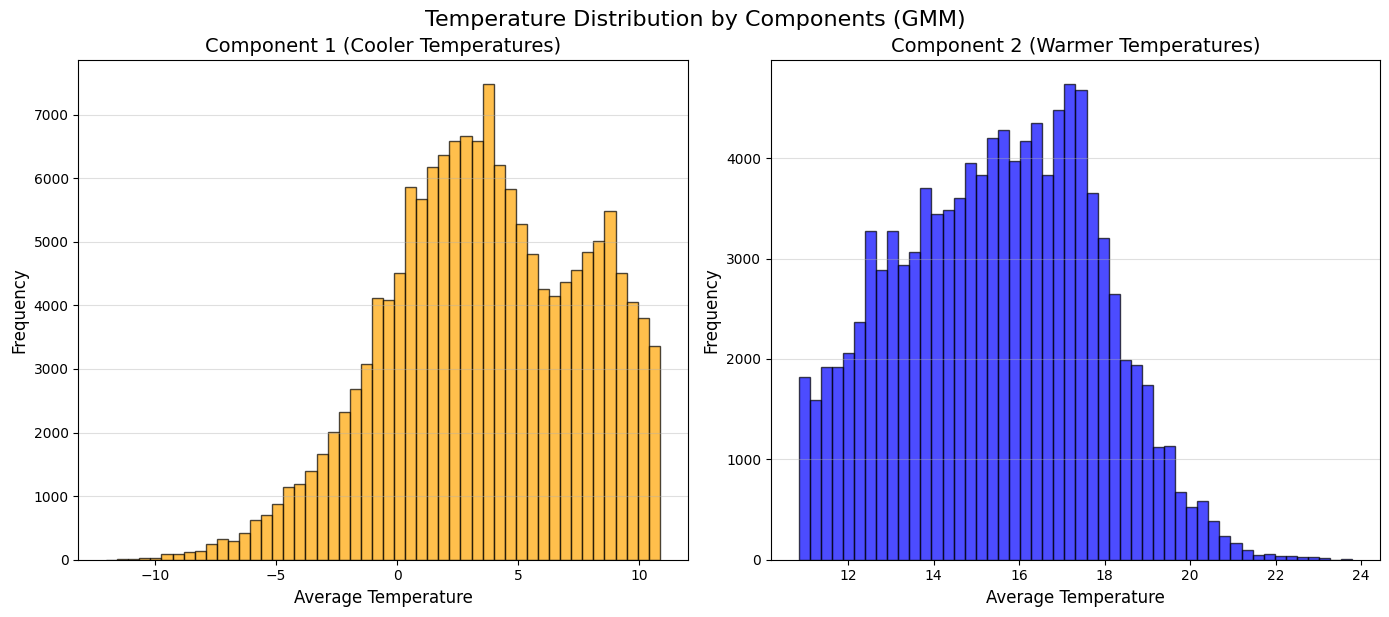

In [32]:
plt.figure(figsize=(14, 6))

# Plot for Component 1
plt.subplot(1, 2, 1)
plt.hist(component1, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Component 1 (Cooler Temperatures)', fontsize=14)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.4)

# Plot for Component 2
plt.subplot(1, 2, 2)
plt.hist(component2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Component 2 (Warmer Temperatures)', fontsize=14)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.4)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Temperature Distribution by Components (GMM)', fontsize=16, y=1.02)
plt.show()



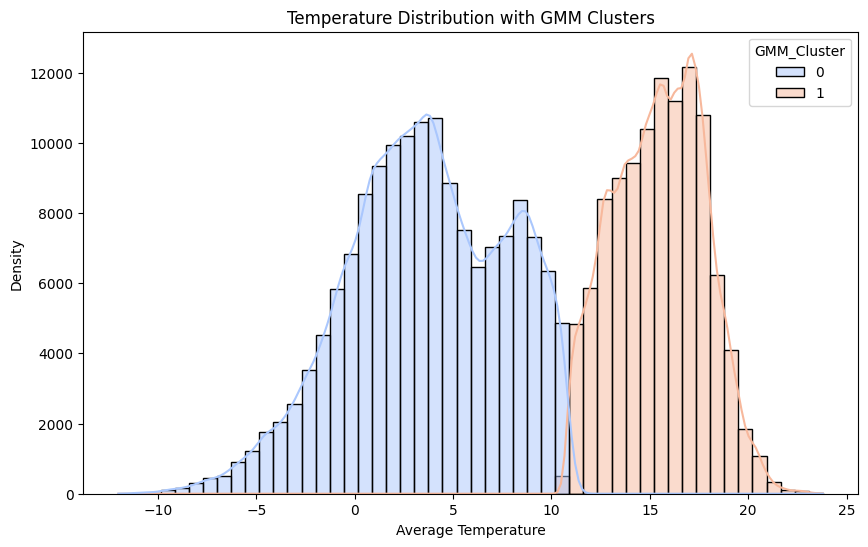

Component 1 Statistics:
count    108175.000000
mean         15.462325
std           2.298851
min          10.843000
25%          13.687000
50%          15.551000
75%          17.188000
max          23.795000
Name: AverageTemperature, dtype: float64

Component 2 Statistics:
count    108175.000000
mean         15.462325
std           2.298851
min          10.843000
25%          13.687000
50%          15.551000
75%          17.188000
max          23.795000
Name: AverageTemperature, dtype: float64


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have GMM labels and original data
data_country['GMM_Cluster'] = labels  # Add GMM labels as a new column

# Reshape the data to long form
plot_data = data_country[['AverageTemperature', 'GMM_Cluster']]

# Plotting the distribution with GMM clusters as hue
plt.figure(figsize=(10, 6))
sns.histplot(plot_data, x='AverageTemperature', hue='GMM_Cluster', kde=True, palette='coolwarm', bins=50)
plt.title("Temperature Distribution with GMM Clusters")
plt.xlabel("Average Temperature")
plt.ylabel("Density")
plt.show()
component = data_country[data_country['GMM_Cluster'] == 0]['AverageTemperature']
component1 = data_country[data_country['GMM_Cluster'] == 1]['AverageTemperature']

print("Component 1 Statistics:")
print(component1.describe())

print("\nComponent 2 Statistics:")
print(component2.describe())

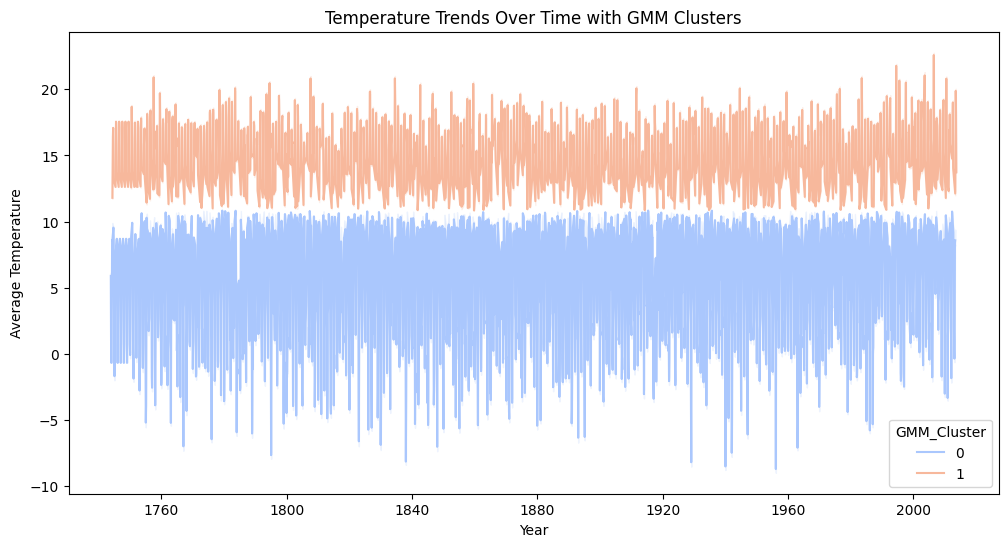

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_country['dt'], y=data_country['AverageTemperature'], hue=data_country['GMM_Cluster'], palette="coolwarm")
plt.title("Temperature Trends Over Time with GMM Clusters")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()


In [36]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data_country['Year'], data_country['AverageTemperature'])
print(f"Trend: {slope:.4f} °C per year (p-value={p_value:.4f})")


Trend: 0.0034 °C per year (p-value=0.0000)


In [37]:
# Assuming `labels` contains the GMM cluster labels and `data_country` has 'TemperatureAnomaly'
data_country['GMM_Cluster'] = labels  # Add GMM cluster labels to the dataframe
# Save the updated dataset
data_country.to_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', index=False)
# Verify the updated dataframe with both TemperatureAnomaly and GMM_Cluster columns
#print(data_country[['TemperatureAnomaly', 'GMM_Cluster']].head())


Years and coresponding avg

          dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0 1743-11-01               6.425                          1.628  Aachen   
1 1743-12-01               0.689                          1.821  Aachen   
2 1744-01-01              -0.673                          2.095  Aachen   
3 1744-02-01               0.762                          1.923  Aachen   
4 1744-03-01               3.754                          1.626  Aachen   

   Country Latitude Longitude  TemperatureAnomaly  Year  Month  Season  \
0  Germany   50.63N     6.34E           -2.398997  1743     11    Fall   
1  Germany   50.63N     6.34E           -8.134997  1743     12  Winter   
2  Germany   50.63N     6.34E           -9.496997  1744      1  Winter   
3  Germany   50.63N     6.34E           -8.061997  1744      2  Winter   
4  Germany   50.63N     6.34E           -5.069997  1744      3  Spring   

   TemperatureChange  Yearly_Avg_Temperature_x  Yearly_Avg_Temperature_y  \
0                NaN        

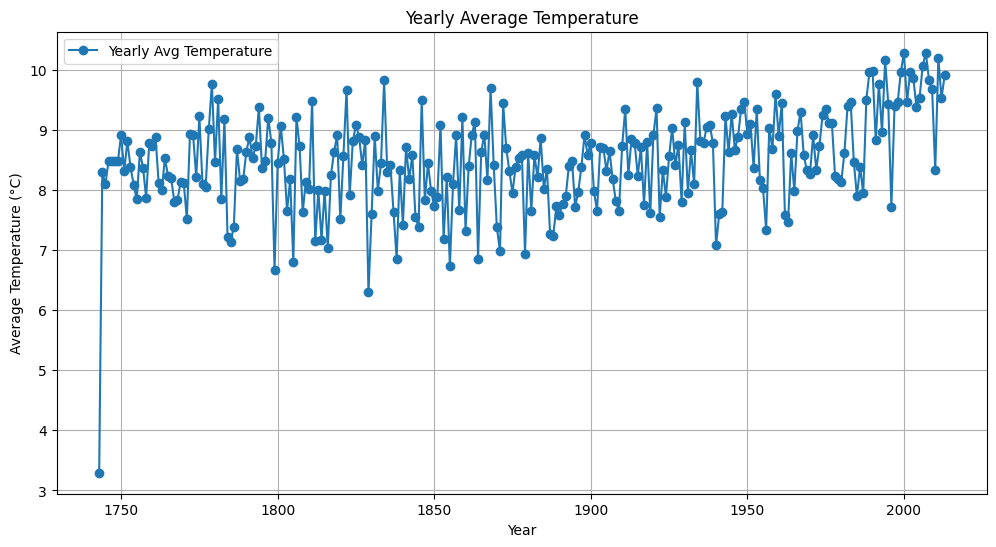

In [38]:
# Check if 'AverageTemperature' exists
if 'AverageTemperature' in data_country.columns:
    yearly_avg = data_country.groupby('Year', as_index=False)['AverageTemperature'].mean()
    yearly_avg.rename(columns={'AverageTemperature': 'Yearly_Avg_Temperature'}, inplace=True)
    
    # Merge the Yearly Average Temperature back into the main dataset with suffix handling
    data_country = data_country.merge(yearly_avg[['Year', 'Yearly_Avg_Temperature']], on='Year', how='left', suffixes=('', '_avg'))

    # Verify update
    print(data_country.head())

    # Plotting Yearly Average Temperature
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_avg['Year'], yearly_avg['Yearly_Avg_Temperature'], label='Yearly Avg Temperature', marker='o')
    plt.title('Yearly Average Temperature')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Error: 'AverageTemperature' column not found in dataset.")


In [42]:
import pandas as pd

# Load your dataset
data_count = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', parse_dates=[0])

# Remove records where Year is 1743 or 2013
data_count = data_count[~data_count['Year'].isin([1743, 2013])]

# Check the result to ensure the rows are removed
print(data_count.head())
print(data_count['Year'].unique())  # Verify that 1743 and 2013 are removed

# Save the updated dataset back to the same CSV file
data_count.to_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', index=False)

# Confirm the save
print("Updated data saved to 'imputed_deu_data1.csv'")


           dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0  1744-01-01              -0.673                          2.095  Aachen   
1  1744-02-01               0.762                          1.923  Aachen   
2  1744-03-01               3.754                          1.626  Aachen   
3  1744-04-01               8.599                          2.485  Aachen   
4  1744-05-01              11.699                          1.330  Aachen   

   Country Latitude Longitude  TemperatureAnomaly  Year  Month  Season  \
0  Germany   50.63N     6.34E           -9.496997  1744      1  Winter   
1  Germany   50.63N     6.34E           -8.061997  1744      2  Winter   
2  Germany   50.63N     6.34E           -5.069997  1744      3  Spring   
3  Germany   50.63N     6.34E           -0.224997  1744      4  Spring   
4  Germany   50.63N     6.34E            2.875003  1744      5  Spring   

   TemperatureChange  GMM_Cluster  
0             -1.362            0  
1              1.435      